In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import mahotas as mh
import os, glob, shutil

In [3]:
DATAFOLDER = '/hpcstor6/scratch01/y/y.shah001/Forest Segmented/Forest Segmented'

In [4]:
os.listdir(DATAFOLDER)

['masks',
 'images',
 'Forest_final_img.npy',
 'Forest_final_mask.npy',
 'meta_data.csv']

In [5]:
train_image_dir = os.path.join(DATAFOLDER, 'images')
train_mask_dir =  os.path.join(DATAFOLDER, 'masks')

In [6]:
all_image_files = sorted(sorted(glob.glob(train_image_dir+'/*.jpg')))
all_mask_files = sorted(sorted(glob.glob(train_mask_dir+'/*.jpg')))

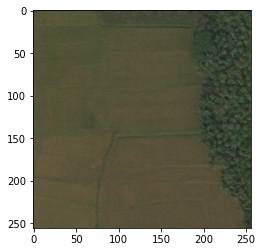

In [7]:
first_image = mh.imread(all_image_files[0])
imshow(first_image, cmap='gray')

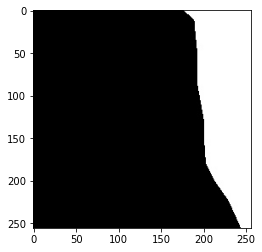

In [8]:
first_mask = mh.imread(all_mask_files[0])
imshow(first_mask, cmap='gray')

In [9]:
len(all_mask_files)

5108

In [10]:
first_mask.shape

(256, 256, 3)

In [11]:
images = np.zeros((5108, 512, 512), dtype=np.uint8)

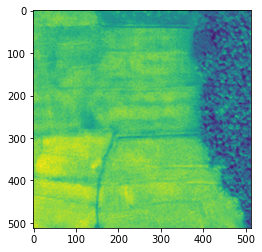

In [12]:
import numpy as np
import skimage.io as mh
import skimage.transform as skt

n_images = 5108  # number of images to load

# create array to hold the images
images = np.zeros((n_images, 512, 512), dtype=np.float32)

for i, a in enumerate(all_image_files[:n_images]):
    img = mh.imread(a)

    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.float32)
            left_resized /= 255.0  # normalize pixel values to [0, 1]
            if i < len(images):
                images[i] = left_resized

        # grab right image
        right = img[0:512,512:,0]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.float32)
                right_resized /= 255.0  # normalize pixel values to [0, 1]
                if i < len(images):
                    images[i] = right_resized

    elif img.ndim == 2:
        left = img[0:512,0:512]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.float32)
            left_resized /= 255.0  # normalize pixel values to [0, 1]
            if i < len(images):
                images[i] = left_resized

        right = img[0:512,512:]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.float32)
                right_resized /= 255.0  # normalize pixel values to [0, 1]
                if i < len(images):
                    images[i] = right_resized


imshow(images[0])


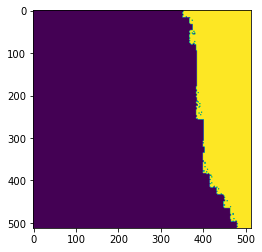

In [13]:
import numpy as np
import mahotas as mh
import skimage.transform as skt
import matplotlib.pyplot as plt

n_images = 5108
masks = np.zeros((n_images, 512, 512), dtype=np.bool)

for i, a in enumerate(all_mask_files):
    img = mh.imread(a)
    
    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.bool)
            if i < len(masks):
                masks[i] = left_resized

        # grab right image
        right = img[0:512,512:,0]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.bool)
                if i < len(masks):
                    masks[i] = right_resized
                
    elif img.ndim == 2:
        left = img[0:512,0:512]
        left_resized = skt.resize(left, (512, 512), preserve_range=True)
        if np.prod(left_resized.shape) > 0:
            left_resized = left_resized.astype(np.bool)
            if i < len(masks):
                masks[i] = left_resized

        right = img[0:512,512:]
        if right.shape[0] > 0 and right.shape[1] > 0:  # check if right has at least one pixel
            right_resized = skt.resize(right, (512, 512), preserve_range=True)
            if np.prod(right_resized.shape) > 0:
                right_resized = right_resized.astype(np.bool)
                if i < len(masks):
                    masks[i] = right_resized


plt.imshow(masks[0])
plt.show()

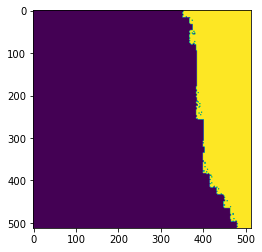

In [14]:
imshow(masks[0])

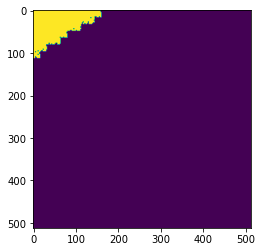

In [15]:
imshow(masks[-1])

In [16]:
images2 = np.expand_dims(images, axis=-1)

In [17]:
images2.shape

(5108, 512, 512, 1)

In [18]:
masks2 = np.expand_dims(masks, axis=-1)

In [19]:
masks2.shape

(5108, 512, 512, 1)

In [20]:
print('Image dtype:', images2.dtype)
print('Mask dtype:', masks2.dtype)

Image dtype: float32
Mask dtype: bool


In [ ]:
unique_values = np.unique(masks2)
if len(unique_values) == 2 and np.array_equal(unique_values, [0, 1]):
    print('Mask is a binary mask')

In [ ]:
type(images2)
type(masks2)

In [23]:
np.save('/hpcstor6/scratch01/y/y.shah001/Forest Segmented/Forest Segmented/Forest_final_img.npy', images2)

In [24]:
np.save('/hpcstor6/scratch01/y/y.shah001/Forest Segmented/Forest Segmented/Forest_final_mask.npy', masks2)